# Lake model continued

In the previous week you used the lake problem as a means of getting aquinted with the workbench. In this assignment we will continue with the lake problem, focussing explicitly on using it for open exploration. You can use the second part of [this tutorial](https://emaworkbench.readthedocs.io/en/latest/indepth_tutorial/open-exploration.html) for help.

**It is paramount that you are using the lake problem with 100 decision variables, rather than the one found on the website with the seperate anthropogenic release decision**

## Apply scenario discovery

1. Generate 10 policies and 1000 scenarios and evaluate them.
2. The experiments array contains the values for each of the 100 decision levers. This might easily mess up the analysis. Remove these columns from the experiment array. *hint: use `experiments.drop`*
3. Apply scenario discovery, focussing on the 10 percent of worst outcomes for reliability


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time 

from ema_workbench import RealParameter, ScalarOutcome, Constant, Model
from ema_workbench import MultiprocessingEvaluator, ema_logging, perform_experiments, SequentialEvaluator, IpyparallelEvaluator

from ema_workbench.analysis import dimensional_stacking

from lakemodel_function import lake_problem

from ema_workbench.analysis import prim
from ema_workbench.util import ema_logging

ema_logging.log_to_stderr(ema_logging.INFO)

<Logger EMA (DEBUG)>

In [2]:
model = Model('LakeProblem', function=lake_problem)

model.uncertainties = [RealParameter('mean', 0.01, 0.05),
                       RealParameter('stdev', 0.001, 0.005),
                       RealParameter('b', 0.1, 0.45),
                       RealParameter('q', 2, 4.5),
                       RealParameter('delta', 0.93, 0.99)]

# specify outcomes
model.outcomes = [
    ScalarOutcome("max_P"),
    ScalarOutcome("utility"),
    ScalarOutcome("inertia"),
    ScalarOutcome("reliability"),
]

# set levers
model.levers = [RealParameter('l'+str(i),0,0.1)for i in range(0,99)]



In [3]:
ema_logging.log_to_stderr(ema_logging.INFO)

start_seq = time.time()

with SequentialEvaluator(model) as evaluator:
    results = evaluator.perform_experiments(scenarios=1000, policies=10)
    
end_seq = time.time()
time_sequential = end_seq - start_seq
print(time_sequential) 

[MainProcess/INFO] performing 1000 scenarios * 10 policies * 1 model(s) = 10000 experiments
100%|████████████████████████████████████| 10000/10000 [03:04<00:00, 54.25it/s]
[MainProcess/INFO] experiments finished


184.41624307632446


In [4]:
experiments, outcomes = results
outcomes_raw = outcomes.copy() 
experiments_drop = experiments.copy()
experiments_drop


,b,delta,mean,q,stdev,l0,l1,l10,l11,l12,...,l92,l93,l94,l95,l96,l97,l98,scenario,policy,model
0,0.393109,0.966381,0.015332,2.087048,0.002036,0.010302,0.038416,0.068757,0.050964,0.036331,...,0.064513,0.065443,0.089032,0.033064,0.065699,0.002166,0.016551,10,0,LakeProblem
1,0.439614,0.968062,0.032415,2.657677,0.002263,0.010302,0.038416,0.068757,0.050964,0.036331,...,0.064513,0.065443,0.089032,0.033064,0.065699,0.002166,0.016551,11,0,LakeProblem
2,0.246871,0.931908,0.042378,3.437911,0.002181,0.010302,0.038416,0.068757,0.050964,0.036331,...,0.064513,0.065443,0.089032,0.033064,0.065699,0.002166,0.016551,12,0,LakeProblem
3,0.111284,0.954914,0.015880,4.006306,0.002204,0.010302,0.038416,0.068757,0.050964,0.036331,...,0.064513,0.065443,0.089032,0.033064,0.065699,0.002166,0.016551,13,0,LakeProblem
4,0.136031,0.960255,0.027825,4.264049,0.003053,0.010302,0.038416,0.068757,0.050964,0.036331,...,0.064513,0.065443,0.089032,0.033064,0.065699,0.002166,0.016551,14,0,LakeProblem
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.167685,0.961963,0.015422,3.644220,0.003941,0.090393,0.092987,0.057561,0.093467,0.099449,...,0.019903,0.047564,0.014830,0.008809,0.094021,0.016998,0.055073,1005,9,LakeProblem
9996,0.194506,0.943971,0.038521,3.333830,0.001934,0.090393,0.092987,0.057561,0.093467,0.099449,...,0.019903,0.047564,0.014830,0.008809,0.094021,0.016998,0.055073,1006,9,LakeProblem
9997,0.145347,0.980646,0.044637,3.027171,0.002312,0.090393,0.092987,0.057561,0.093467,0.099449,...,0.019903,0.047564,0.014830,0.008809,0.094021,0.016998,0.055073,1007,9,LakeProblem
9998,0.126004,0.982021,0.038060,2.997892,0.003388,0.090393,0.092987,0.057561,0.093467,0.099449,...,0.019903,0.047564,0.014830,0.008809,0.094021,0.016998,0.055073,1008,9,LakeProblem


In [5]:
for i in range(0,99):
    experiments_drop = experiments_drop.drop(labels='l'+str(i), axis=1)
    
experiments_drop

,b,delta,mean,q,stdev,scenario,policy,model
0,0.393109,0.966381,0.015332,2.087048,0.002036,10,0,LakeProblem
1,0.439614,0.968062,0.032415,2.657677,0.002263,11,0,LakeProblem
2,0.246871,0.931908,0.042378,3.437911,0.002181,12,0,LakeProblem
3,0.111284,0.954914,0.015880,4.006306,0.002204,13,0,LakeProblem
4,0.136031,0.960255,0.027825,4.264049,0.003053,14,0,LakeProblem
...,...,...,...,...,...,...,...,...
9995,0.167685,0.961963,0.015422,3.644220,0.003941,1005,9,LakeProblem
9996,0.194506,0.943971,0.038521,3.333830,0.001934,1006,9,LakeProblem
9997,0.145347,0.980646,0.044637,3.027171,0.002312,1007,9,LakeProblem
9998,0.126004,0.982021,0.038060,2.997892,0.003388,1008,9,LakeProblem


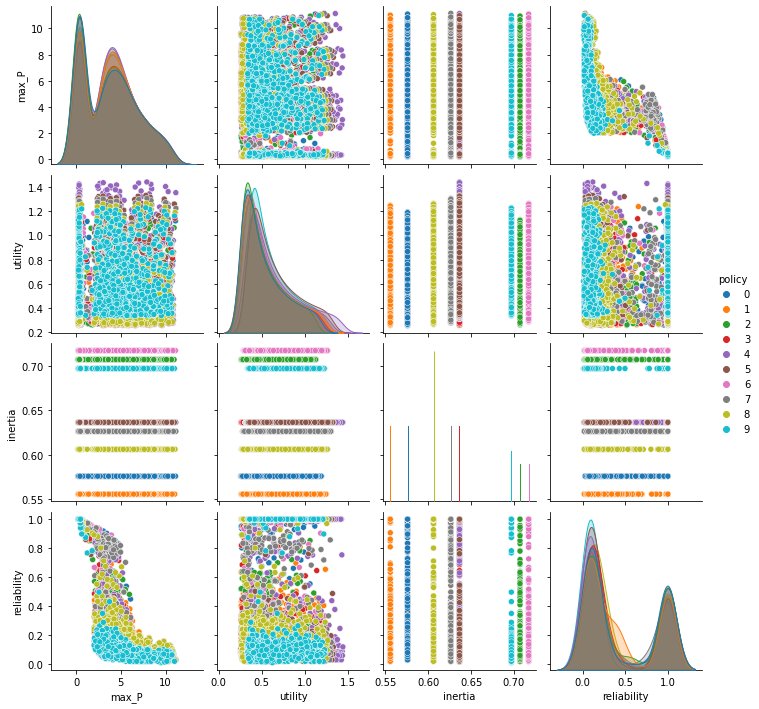

In [6]:
policies = experiments["policy"]
for i, policy in enumerate(np.unique(policies)):
    experiments.loc[policies == policy, "policy"] = str(i)

data = pd.DataFrame(outcomes)
data["policy"] = policies

sns.pairplot(data, hue="policy", vars=list(outcomes.keys()))
plt.show()

In [7]:
experiments_drop

,b,delta,mean,q,stdev,scenario,policy,model
0,0.393109,0.966381,0.015332,2.087048,0.002036,10,0,LakeProblem
1,0.439614,0.968062,0.032415,2.657677,0.002263,11,0,LakeProblem
2,0.246871,0.931908,0.042378,3.437911,0.002181,12,0,LakeProblem
3,0.111284,0.954914,0.015880,4.006306,0.002204,13,0,LakeProblem
4,0.136031,0.960255,0.027825,4.264049,0.003053,14,0,LakeProblem
...,...,...,...,...,...,...,...,...
9995,0.167685,0.961963,0.015422,3.644220,0.003941,1005,9,LakeProblem
9996,0.194506,0.943971,0.038521,3.333830,0.001934,1006,9,LakeProblem
9997,0.145347,0.980646,0.044637,3.027171,0.002312,1007,9,LakeProblem
9998,0.126004,0.982021,0.038060,2.997892,0.003388,1008,9,LakeProblem


In [8]:
reliability = outcomes['reliability']
#y = reliability[0,:] < reliability[-1, :]
y_2 = reliability[:] < np.quantile(a = outcomes['reliability'],q =0.1)
outcomes['outcome of interest'] = y_2[:]
outcomes

{'max_P': array([2.4294654 , 0.37294983, 4.49934592, ..., 7.55480844, 8.65953023,
        5.22007067]),
 'utility': array([0.52802134, 0.55297179, 0.26401092, ..., 0.88855099, 0.92794341,
        0.53023272]),
 'inertia': array([0.57575758, 0.57575758, 0.57575758, ..., 0.6969697 , 0.6969697 ,
        0.6969697 ]),
 'reliability': array([0.1737, 1.    , 0.1202, ..., 0.05  , 0.0405, 0.06  ]),
 'outcome of interest': array([False, False, False, ..., False,  True, False])}

In [9]:
outcomes#['reliability_of_interest']

{'max_P': array([2.4294654 , 0.37294983, 4.49934592, ..., 7.55480844, 8.65953023,
        5.22007067]),
 'utility': array([0.52802134, 0.55297179, 0.26401092, ..., 0.88855099, 0.92794341,
        0.53023272]),
 'inertia': array([0.57575758, 0.57575758, 0.57575758, ..., 0.6969697 , 0.6969697 ,
        0.6969697 ]),
 'reliability': array([0.1737, 1.    , 0.1202, ..., 0.05  , 0.0405, 0.06  ]),
 'outcome of interest': array([False, False, False, ..., False,  True, False])}

In [10]:
experiments_drop


,b,delta,mean,q,stdev,scenario,policy,model
0,0.393109,0.966381,0.015332,2.087048,0.002036,10,0,LakeProblem
1,0.439614,0.968062,0.032415,2.657677,0.002263,11,0,LakeProblem
2,0.246871,0.931908,0.042378,3.437911,0.002181,12,0,LakeProblem
3,0.111284,0.954914,0.015880,4.006306,0.002204,13,0,LakeProblem
4,0.136031,0.960255,0.027825,4.264049,0.003053,14,0,LakeProblem
...,...,...,...,...,...,...,...,...
9995,0.167685,0.961963,0.015422,3.644220,0.003941,1005,9,LakeProblem
9996,0.194506,0.943971,0.038521,3.333830,0.001934,1006,9,LakeProblem
9997,0.145347,0.980646,0.044637,3.027171,0.002312,1007,9,LakeProblem
9998,0.126004,0.982021,0.038060,2.997892,0.003388,1008,9,LakeProblem


[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 10000 points remaining, containing 801 cases of interest
[MainProcess/INFO] mean: 0.9185185185185185, mass: 0.054, coverage: 0.6192259675405742, density: 0.9185185185185185 restricted_dimensions: 3


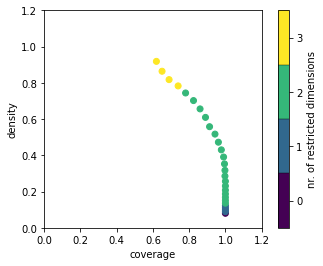

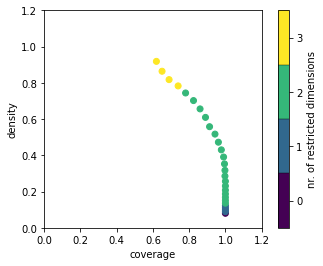

In [11]:
prim_alg = prim.Prim(experiments_drop, outcomes['outcome of interest'], threshold=0.8, peel_alpha=0.1) #define the prim algorithm 
# if the last box has a density above the threshold, then the analysis is accepted as valuable. Otherwise the analysis isn't accepted 
box1 = prim_alg.find_box() #find the best box 

box1.show_tradeoff()

[MainProcess/INFO] resample 0
[MainProcess/INFO] resample 1
[MainProcess/INFO] resample 2
[MainProcess/INFO] resample 3
[MainProcess/INFO] resample 4
[MainProcess/INFO] resample 5
[MainProcess/INFO] resample 6
[MainProcess/INFO] resample 7
[MainProcess/INFO] resample 8
[MainProcess/INFO] resample 9


        reproduce coverage  reproduce density
b                      0.0              100.0
q                      0.0              100.0
delta                  0.0                0.0
mean                   0.0                0.0
stdev                  0.0                0.0
policy                 0.0                0.0
coverage         1.0
density     0.230836
id                10
mass           0.347
mean        0.230836
res_dim            2
Name: 10, dtype: object

     box 10                                          
        min       max                       qp values
q  2.000861  3.317575  [-1.0, 1.4022944363726752e-70]
b  0.100022  0.329614  [-1.0, 2.0117680943695853e-34]



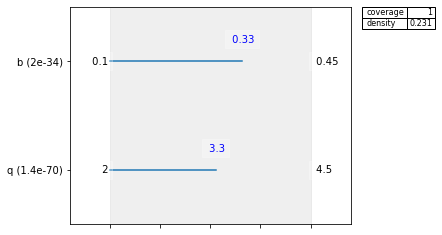

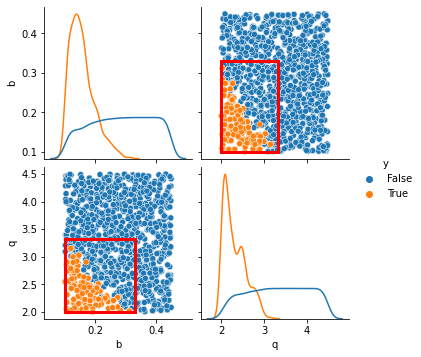

In [12]:
#look at the 21st box 
n_box = 10

print(box1.resample(n_box))
box1.inspect(n_box) 
box1.inspect(n_box, style="graph")
box1.show_pairs_scatter(n_box)

plt.show()

## Visualize the results using Dimensional Stacking
Take the classification of outcomes as used in step 3 of scenario discovery, and instead visualize the results using dimensional stacking. How do these results compare to the insights from scenario discovery?

[MainProcess/INFO] model dropped from analysis because only a single category


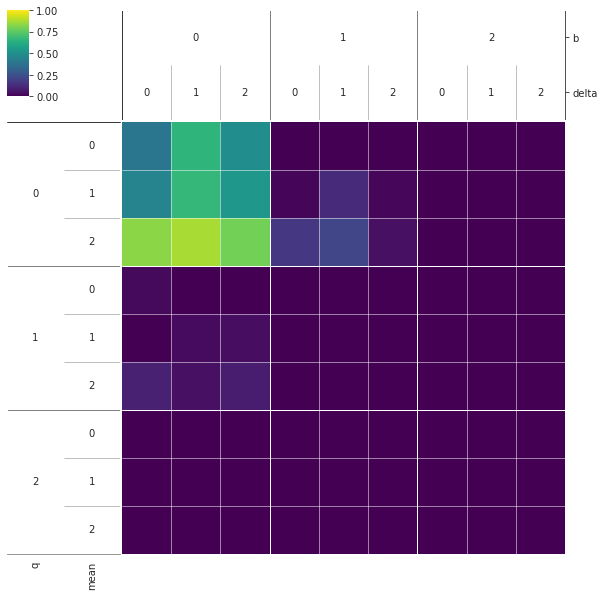

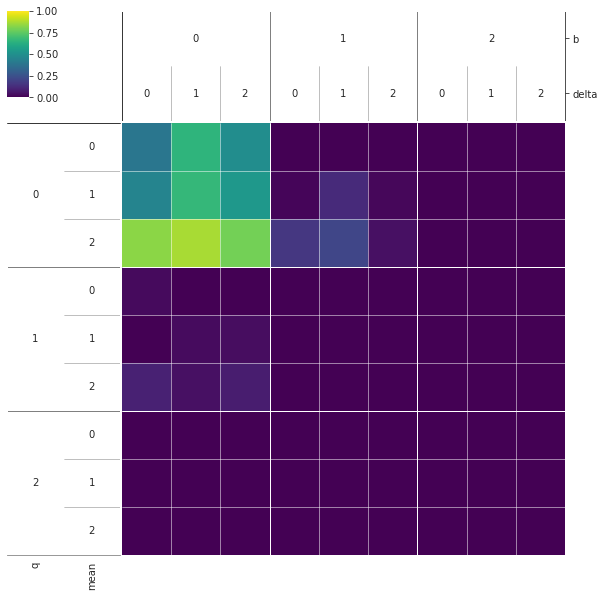

In [13]:

dimensional_stacking.create_pivot_plot(experiments_drop,outcomes['outcome of interest'],2,nbins = 3)